<a href="https://colab.research.google.com/github/redun1/MicroCDA/blob/main/GroupProject3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [413]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
%matplotlib inline

In [414]:
df = pd.read_csv('https://raw.githubusercontent.com/glopez21/ML-Data/main/2020%20November%20General%20Election%20-%20Turnout%20Rates.csv')

In [415]:
df.head()

,State,Source,Official/Unofficial,Total Ballots Counted (Estimate),Vote for Highest Office (President),VEP Turnout Rate,Voting-Eligible Population (VEP),Voting-Age Population (VAP),% Non-citizen,Prison,Probation,Parole,Total Ineligible Felon,Overseas Eligible,State Abv
0,United States,NaN,NaN,"158,835,004",NaN,66.4%,"239,247,182","257,605,088",7.8%,"1,461,074","1,962,811","616,440","3,294,457","4,971,025",NaN
1,Alabama,https://www2.alabamavotes.gov/electionnight/st...,Unofficial,"2,306,587","2,297,295",62.6%,"3,683,055","3,837,540",2.3%,"25,898","50,997","10,266","67,782",NaN,AL
2,Alaska,https://www.elections.alaska.gov/results/20GEN...,NaN,"367,000",NaN,69.8%,"525,568","551,117",3.4%,"4,293","2,074","1,348","6,927",NaN,AK
3,Arizona,https://results.arizona.vote/#/featured/18/0,NaN,"3,400,000",NaN,65.5%,"5,189,000","5,798,473",8.9%,"38,520","76,844","7,536","93,699",NaN,AZ
4,Arkansas,https://results.enr.clarityelections.com/AR/10...,Unofficial,"1,212,030","1,206,697",55.5%,"2,182,375","2,331,171",3.6%,"17,510","36,719","24,698","64,974",NaN,AR


In [416]:
df.shape

(52, 15)

In [417]:
#check out data types of all current columns
df.dtypes

State                                  object
Source                                 object
Official/Unofficial                    object
Total Ballots Counted (Estimate)       object
Vote for Highest Office (President)    object
VEP Turnout Rate                       object
Voting-Eligible Population (VEP)       object
Voting-Age Population (VAP)            object
% Non-citizen                          object
Prison                                 object
Probation                              object
Parole                                 object
Total Ineligible Felon                 object
Overseas Eligible                      object
State Abv                              object
dtype: object

In [418]:
#check out how many null values there are across df
df.isnull().sum()

State                                   0
Source                                 12
Official/Unofficial                    27
Total Ballots Counted (Estimate)        0
Vote for Highest Office (President)    28
VEP Turnout Rate                        0
Voting-Eligible Population (VEP)        0
Voting-Age Population (VAP)             0
% Non-citizen                           0
Prison                                  0
Probation                               0
Parole                                  0
Total Ineligible Felon                  0
Overseas Eligible                      51
State Abv                               1
dtype: int64

In [419]:
#Create new DatafFrame that no longer includes unncessary columns
## "we decided to drop these columns because they did not meet out expectations"
df2 = df.drop(labels=['Source','Overseas Eligible','Official/Unofficial','Vote for Highest Office (President)'],axis=1)

In [420]:
df2.shape

(52, 11)

#Handling missing data

In [421]:
#determine where there are missing values
df2.isnull().sum()

State                               0
Total Ballots Counted (Estimate)    0
VEP Turnout Rate                    0
Voting-Eligible Population (VEP)    0
Voting-Age Population (VAP)         0
% Non-citizen                       0
Prison                              0
Probation                           0
Parole                              0
Total Ineligible Felon              0
State Abv                           1
dtype: int64

In [422]:
#fill in proper abbreviation for row 1
df2.fillna('USA', inplace=True) #since we know that there is only one na val we have to address
df2.isna().sum()

State                               0
Total Ballots Counted (Estimate)    0
VEP Turnout Rate                    0
Voting-Eligible Population (VEP)    0
Voting-Age Population (VAP)         0
% Non-citizen                       0
Prison                              0
Probation                           0
Parole                              0
Total Ineligible Felon              0
State Abv                           0
dtype: int64

#Amount of (estimated) counted ballots per state

In [423]:
#first remove commas from total ballots col
df2['Total Ballots Counted (Estimate)']=df2['Total Ballots Counted (Estimate)'].str.replace(',','')

#convert to numer
df2['Total Ballots Counted (Estimate)']=pd.to_numeric(df2['Total Ballots Counted (Estimate)'])

#reflects update in dtype
df2.dtypes

State                               object
Total Ballots Counted (Estimate)     int64
VEP Turnout Rate                    object
Voting-Eligible Population (VEP)    object
Voting-Age Population (VAP)         object
% Non-citizen                       object
Prison                              object
Probation                           object
Parole                              object
Total Ineligible Felon              object
State Abv                           object
dtype: object

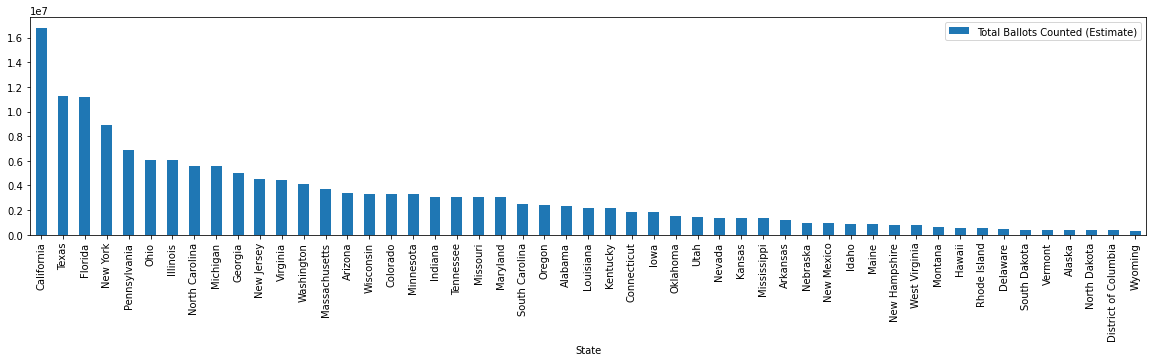

In [424]:
desc= df2.sort_values('Total Ballots Counted (Estimate)',ascending=False)

#to exclude USA since not a state
desc=desc.drop(0) 
first_graph=desc.plot(x='State',y='Total Ballots Counted (Estimate)', kind='bar', figsize=(20,4))

In [425]:
#to show that it matches with dataset
#df2.nlargest(5,'Total Ballots Counted (Estimate)')
desc.nlargest(5,'Total Ballots Counted (Estimate)')

,State,Total Ballots Counted (Estimate),VEP Turnout Rate,Voting-Eligible Population (VEP),Voting-Age Population (VAP),% Non-citizen,Prison,Probation,Parole,Total Ineligible Felon,State Abv
5,California,16800000,64.7%,"25,962,648","30,783,255",15.0%,"104,730",0,"102,586","207,316",CA
44,Texas,11300000,60.2%,"18,784,280","22,058,260",12.6%,"154,913","368,167","109,213","492,390",TX
10,Florida,11150000,71.7%,"15,551,739","17,543,341",10.1%,"91,674","205,033","4,345","223,139",FL
33,New York,8930000,65.3%,"13,670,596","15,372,655",10.5%,"42,408",0,"45,192","87,600",NY
39,Pennsylvania,6900000,70.5%,"9,781,976","10,186,170",3.5%,"44,148",0,0,"44,148",PA


#Non-Citizen Rate per State

In [426]:
#remove '%' from values under the column
df2['% Non-citizen']=df2['% Non-citizen'].str.replace('%','')

#now have as float
df2['% Non-citizen']=pd.to_numeric(df2['% Non-citizen']) 
df2.dtypes

State                                object
Total Ballots Counted (Estimate)      int64
VEP Turnout Rate                     object
Voting-Eligible Population (VEP)     object
Voting-Age Population (VAP)          object
% Non-citizen                       float64
Prison                               object
Probation                            object
Parole                               object
Total Ineligible Felon               object
State Abv                            object
dtype: object

In [427]:
df2.head()

,State,Total Ballots Counted (Estimate),VEP Turnout Rate,Voting-Eligible Population (VEP),Voting-Age Population (VAP),% Non-citizen,Prison,Probation,Parole,Total Ineligible Felon,State Abv
0,United States,158835004,66.4%,"239,247,182","257,605,088",7.8,"1,461,074","1,962,811","616,440","3,294,457",USA
1,Alabama,2306587,62.6%,"3,683,055","3,837,540",2.3,"25,898","50,997","10,266","67,782",AL
2,Alaska,367000,69.8%,"525,568","551,117",3.4,"4,293","2,074","1,348","6,927",AK
3,Arizona,3400000,65.5%,"5,189,000","5,798,473",8.9,"38,520","76,844","7,536","93,699",AZ
4,Arkansas,1212030,55.5%,"2,182,375","2,331,171",3.6,"17,510","36,719","24,698","64,974",AR


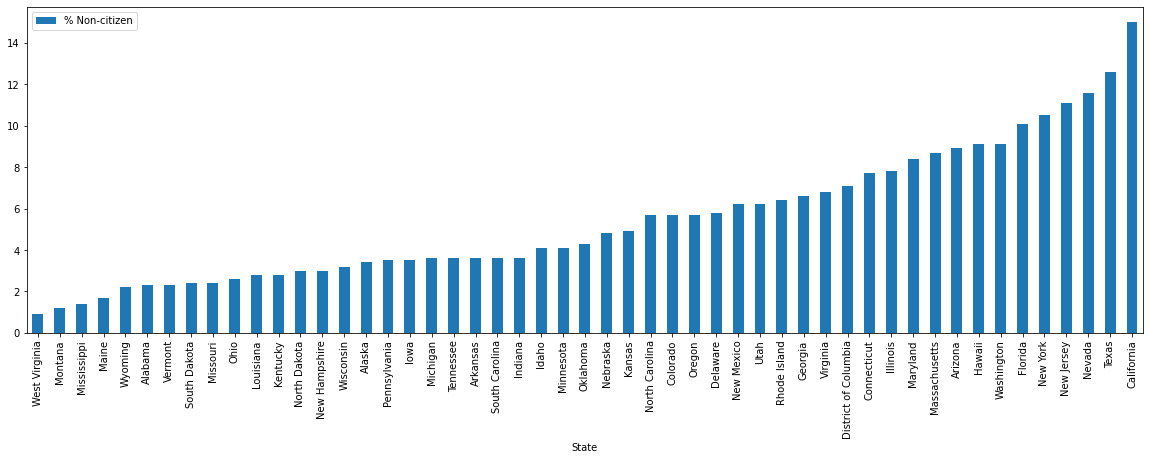

In [428]:
#create new DataFrame that stores this column in ascending order
asc= df2.sort_values('% Non-citizen')

#to exclude USA since not a state (dropped first row from original df)
asc=asc.drop(0) 

second_graph=asc.plot(x='State',y='% Non-citizen', kind='bar', figsize=(20,6))


In [429]:
#to show that it matches with dataset
df2.nlargest(5,'% Non-citizen')

,State,Total Ballots Counted (Estimate),VEP Turnout Rate,Voting-Eligible Population (VEP),Voting-Age Population (VAP),% Non-citizen,Prison,Probation,Parole,Total Ineligible Felon,State Abv
5,California,16800000,64.7%,"25,962,648","30,783,255",15.0,"104,730",0,"102,586","207,316",CA
44,Texas,11300000,60.2%,"18,784,280","22,058,260",12.6,"154,913","368,167","109,213","492,390",TX
29,Nevada,1370000,63.6%,"2,153,915","2,450,946",11.6,"12,399",0,0,"12,399",NV
31,New Jersey,4495000,73.0%,"6,158,999","6,952,008",11.1,"18,099",0,0,"18,099",NJ
33,New York,8930000,65.3%,"13,670,596","15,372,655",10.5,"42,408",0,"45,192","87,600",NY


#Total number of ineligible felons per state

In [430]:
#we need to change dtype of total ineligble felon
df2.dtypes

State                                object
Total Ballots Counted (Estimate)      int64
VEP Turnout Rate                     object
Voting-Eligible Population (VEP)     object
Voting-Age Population (VAP)          object
% Non-citizen                       float64
Prison                               object
Probation                            object
Parole                               object
Total Ineligible Felon               object
State Abv                            object
dtype: object

In [431]:
#first remove commas from total ballots col
df2['Total Ineligible Felon']=df2['Total Ineligible Felon'].str.replace(',','')

#convert to numer
df2['Total Ineligible Felon']=pd.to_numeric(df2['Total Ineligible Felon'])

#reflects update in dtype to int
df2.dtypes

State                                object
Total Ballots Counted (Estimate)      int64
VEP Turnout Rate                     object
Voting-Eligible Population (VEP)     object
Voting-Age Population (VAP)          object
% Non-citizen                       float64
Prison                               object
Probation                            object
Parole                               object
Total Ineligible Felon                int64
State Abv                            object
dtype: object

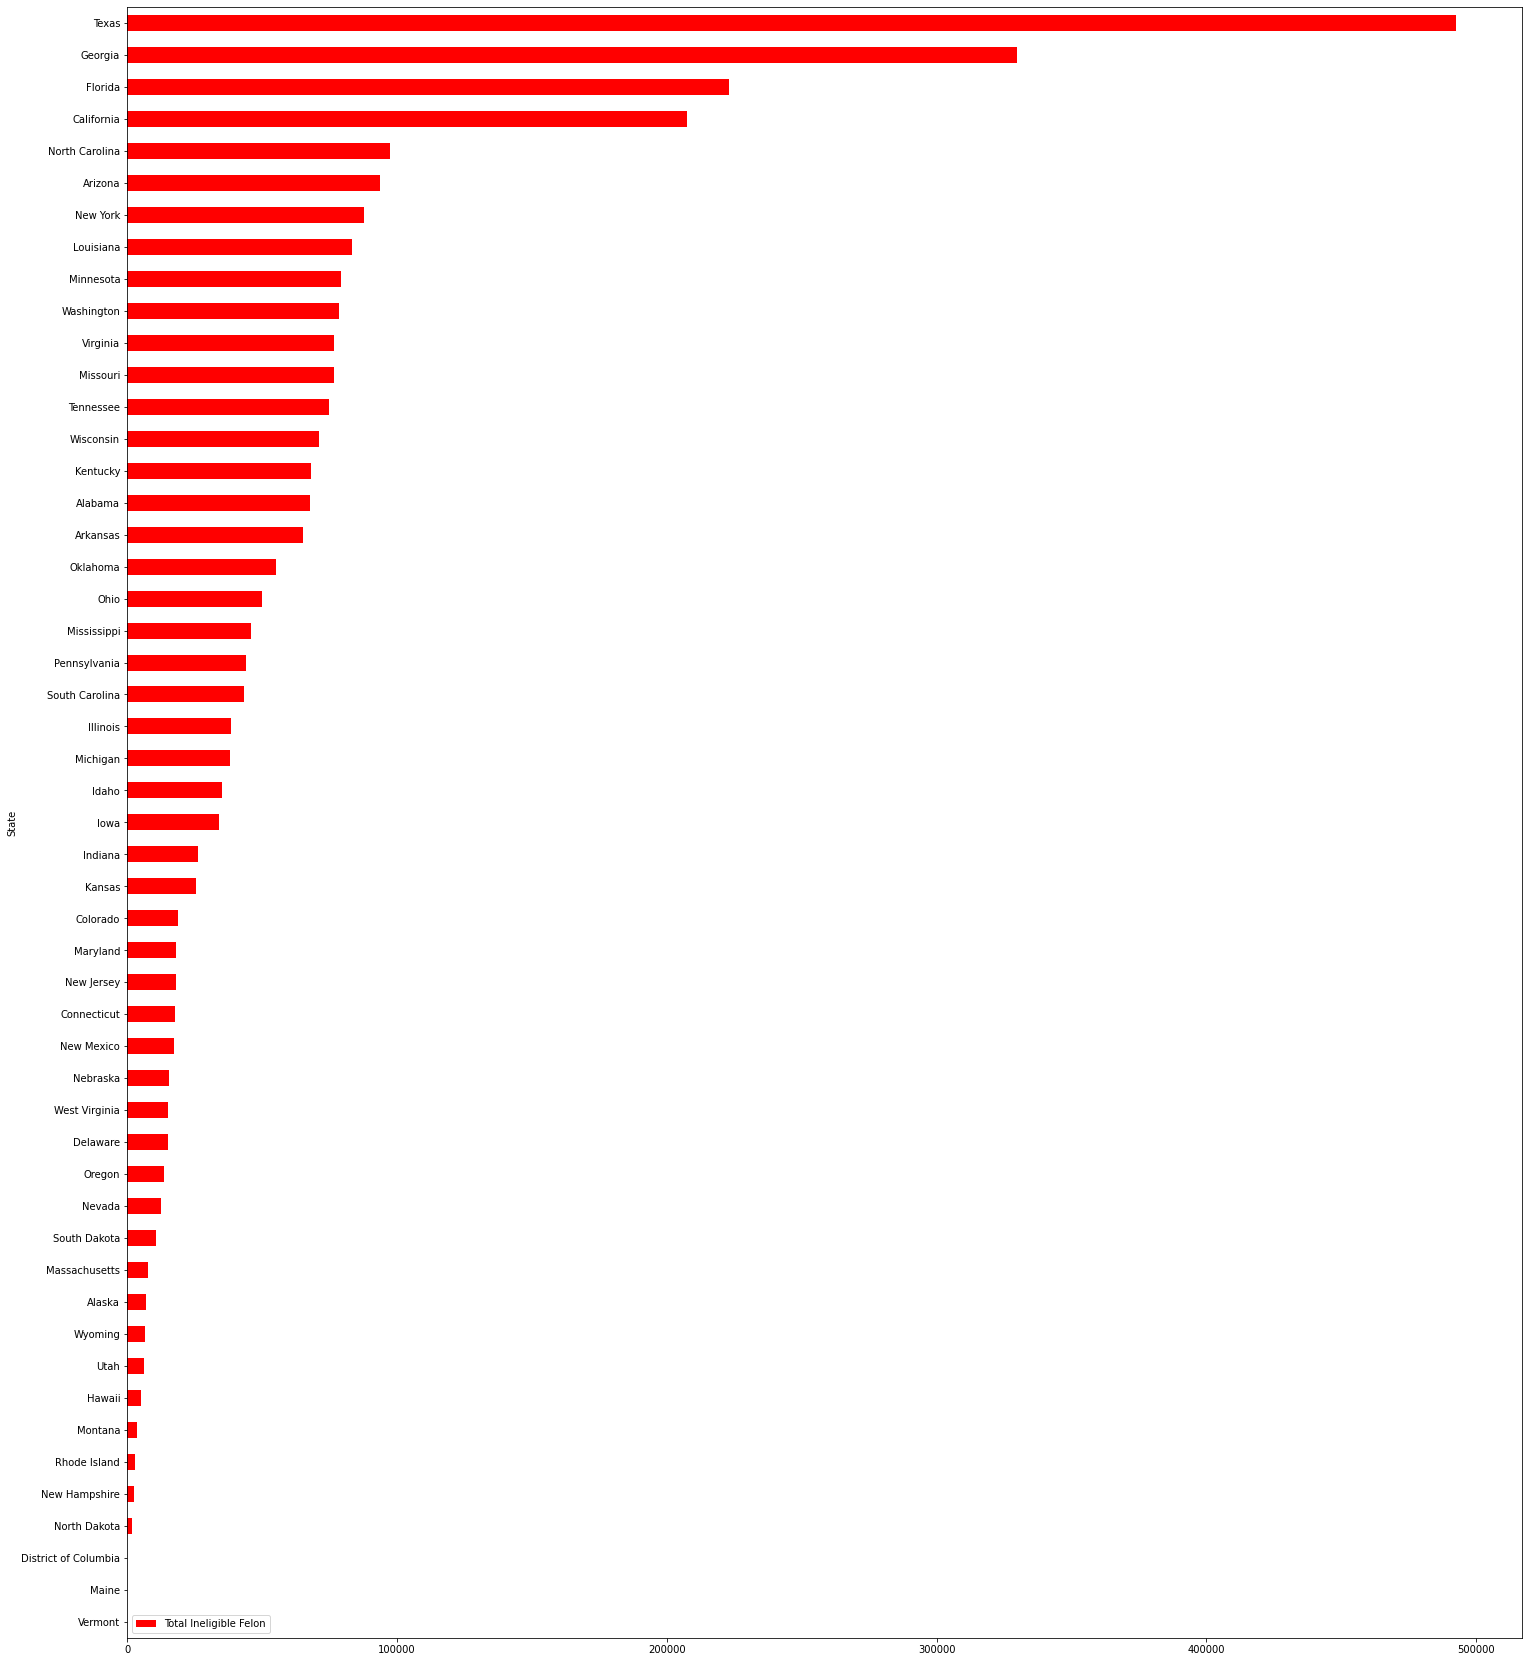

In [432]:
#create new DataFrame that stores this column in ascending order
a= df2.sort_values('Total Ineligible Felon')

#to exclude USA since not a state (dropped first row from original df)
a=a.drop(0) 

third_graph=a.plot(x='State',y='Total Ineligible Felon', kind='barh', figsize=(25,30), color='red')

In [433]:
#to check with dataset
a.nlargest(5,'Total Ineligible Felon')

,State,Total Ballots Counted (Estimate),VEP Turnout Rate,Voting-Eligible Population (VEP),Voting-Age Population (VAP),% Non-citizen,Prison,Probation,Parole,Total Ineligible Felon,State Abv
44,Texas,11300000,60.2%,"18,784,280","22,058,260",12.6,"154,913","368,167","109,213",492390,TX
11,Georgia,5025000,68.1%,"7,383,562","8,255,108",6.6,"50,930","416,771","20,426",329754,GA
10,Florida,11150000,71.7%,"15,551,739","17,543,341",10.1,"91,674","205,033","4,345",223139,FL
5,California,16800000,64.7%,"25,962,648","30,783,255",15.0,"104,730",0,"102,586",207316,CA
34,North Carolina,5600000,72.2%,"7,759,051","8,328,642",5.7,"33,640","80,068","14,215",97497,NC


In [434]:
df2.columns

Index(['State', 'Total Ballots Counted (Estimate)', 'VEP Turnout Rate',
       'Voting-Eligible Population (VEP)', 'Voting-Age Population (VAP)',
       '% Non-citizen', 'Prison', 'Probation', 'Parole',
       'Total Ineligible Felon', 'State Abv'],
      dtype='object')

In [435]:
df2.dtypes

State                                object
Total Ballots Counted (Estimate)      int64
VEP Turnout Rate                     object
Voting-Eligible Population (VEP)     object
Voting-Age Population (VAP)          object
% Non-citizen                       float64
Prison                               object
Probation                            object
Parole                               object
Total Ineligible Felon                int64
State Abv                            object
dtype: object

#Column Conversion to respective data type

In [436]:
df2['VEP Turnout Rate']=df2['VEP Turnout Rate'].str.replace('%','').astype(float)

In [437]:
df2['Voting-Eligible Population (VEP)']=df2['Voting-Eligible Population (VEP)'].str.replace(',','').astype(int)

In [438]:
df2['Voting-Age Population (VAP)']=df2['Voting-Age Population (VAP)'].str.replace(',','').astype(int)

In [439]:
df2['Prison']=df2['Prison'].str.replace(',','').astype(int)

In [440]:
df2['Parole']=df2['Parole'].str.replace(',','').astype(int)

In [441]:
df2['Probation']=df2['Probation'].str.replace(',','').astype(int)

In [442]:
#checking conversion status
df2.dtypes

State                                object
Total Ballots Counted (Estimate)      int64
VEP Turnout Rate                    float64
Voting-Eligible Population (VEP)      int64
Voting-Age Population (VAP)           int64
% Non-citizen                       float64
Prison                                int64
Probation                             int64
Parole                                int64
Total Ineligible Felon                int64
State Abv                            object
dtype: object

In [443]:
df3=df2.drop(0) #new df

In [444]:
df3.head()

,State,Total Ballots Counted (Estimate),VEP Turnout Rate,Voting-Eligible Population (VEP),Voting-Age Population (VAP),% Non-citizen,Prison,Probation,Parole,Total Ineligible Felon,State Abv
1,Alabama,2306587,62.6,3683055,3837540,2.3,25898,50997,10266,67782,AL
2,Alaska,367000,69.8,525568,551117,3.4,4293,2074,1348,6927,AK
3,Arizona,3400000,65.5,5189000,5798473,8.9,38520,76844,7536,93699,AZ
4,Arkansas,1212030,55.5,2182375,2331171,3.6,17510,36719,24698,64974,AR
5,California,16800000,64.7,25962648,30783255,15.0,104730,0,102586,207316,CA


In [445]:
df3.nsmallest(5,'Prison')

,State,Total Ballots Counted (Estimate),VEP Turnout Rate,Voting-Eligible Population (VEP),Voting-Age Population (VAP),% Non-citizen,Prison,Probation,Parole,Total Ineligible Felon,State Abv
9,District of Columbia,350000,64.7,540685,582065,7.1,0,0,0,0,DC
20,Maine,860000,79.2,1085285,1104489,1.7,0,0,0,0,ME
46,Vermont,370000,74.0,499884,511637,2.3,0,0,0,0,VT
35,North Dakota,365000,64.6,565143,584610,3.0,1679,0,0,1679,ND
51,Wyoming,278503,64.6,431364,447915,2.2,2488,5383,934,6759,WY


In [446]:
df3.nlargest(5,'VEP Turnout Rate')

,State,Total Ballots Counted (Estimate),VEP Turnout Rate,Voting-Eligible Population (VEP),Voting-Age Population (VAP),% Non-citizen,Prison,Probation,Parole,Total Ineligible Felon,State Abv
24,Minnesota,3290000,79.9,4118462,4378737,4.1,9712,100076,7381,79140,MN
20,Maine,860000,79.2,1085285,1104489,1.7,0,0,0,0,ME
16,Iowa,1825000,78.6,2321131,2439743,3.5,9216,29137,6652,33933,IA
6,Colorado,3295000,76.4,4313054,4595504,5.7,18905,0,0,18905,CO
50,Wisconsin,3325000,76.1,4368530,4586746,3.2,23574,42909,21015,71193,WI


In [447]:
df3.nlargest(5,'Voting-Eligible Population (VEP)')

,State,Total Ballots Counted (Estimate),VEP Turnout Rate,Voting-Eligible Population (VEP),Voting-Age Population (VAP),% Non-citizen,Prison,Probation,Parole,Total Ineligible Felon,State Abv
5,California,16800000,64.7,25962648,30783255,15.0,104730,0,102586,207316,CA
44,Texas,11300000,60.2,18784280,22058260,12.6,154913,368167,109213,492390,TX
10,Florida,11150000,71.7,15551739,17543341,10.1,91674,205033,4345,223139,FL
33,New York,8930000,65.3,13670596,15372655,10.5,42408,0,45192,87600,NY
39,Pennsylvania,6900000,70.5,9781976,10186170,3.5,44148,0,0,44148,PA


In [448]:
df3[['State', 'VEP Turnout Rate']].head(5)

,State,VEP Turnout Rate
1,Alabama,62.6
2,Alaska,69.8
3,Arizona,65.5
4,Arkansas,55.5
5,California,64.7


In [449]:
df3.sort_values(by=['VEP Turnout Rate'], ascending=False).head(5)

,State,Total Ballots Counted (Estimate),VEP Turnout Rate,Voting-Eligible Population (VEP),Voting-Age Population (VAP),% Non-citizen,Prison,Probation,Parole,Total Ineligible Felon,State Abv
24,Minnesota,3290000,79.9,4118462,4378737,4.1,9712,100076,7381,79140,MN
20,Maine,860000,79.2,1085285,1104489,1.7,0,0,0,0,ME
16,Iowa,1825000,78.6,2321131,2439743,3.5,9216,29137,6652,33933,IA
6,Colorado,3295000,76.4,4313054,4595504,5.7,18905,0,0,18905,CO
50,Wisconsin,3325000,76.1,4368530,4586746,3.2,23574,42909,21015,71193,WI


In [450]:
df3['VEP Turnout Rate'].mean()


67.77254901960784

In [451]:
#reset index
####new_df=df3.set_index('State')

In [452]:
##new_df.head()